In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv', index_col=False)

array([[<Axes: title={'center': 'model_date'}>,
        <Axes: title={'center': 'doors'}>,
        <Axes: title={'center': 'production_date'}>],
       [<Axes: title={'center': 'engine_power'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'owners'}>],
       [<Axes: title={'center': 'restyling'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

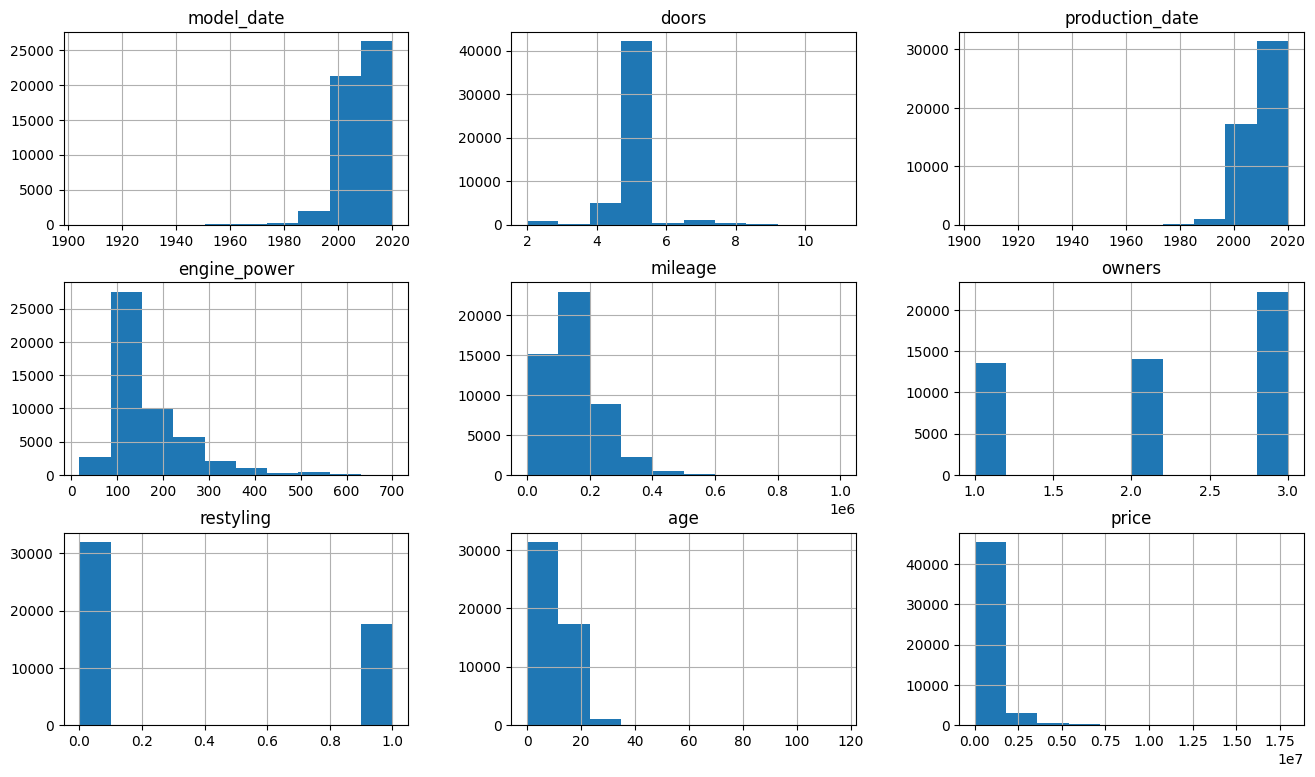

In [3]:
df_train.hist(figsize=(16,9))

array([[<Axes: title={'center': 'model_date'}>,
        <Axes: title={'center': 'doors'}>,
        <Axes: title={'center': 'production_date'}>],
       [<Axes: title={'center': 'engine_power'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'owners'}>],
       [<Axes: title={'center': 'restyling'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'id'}>]],
      dtype=object)

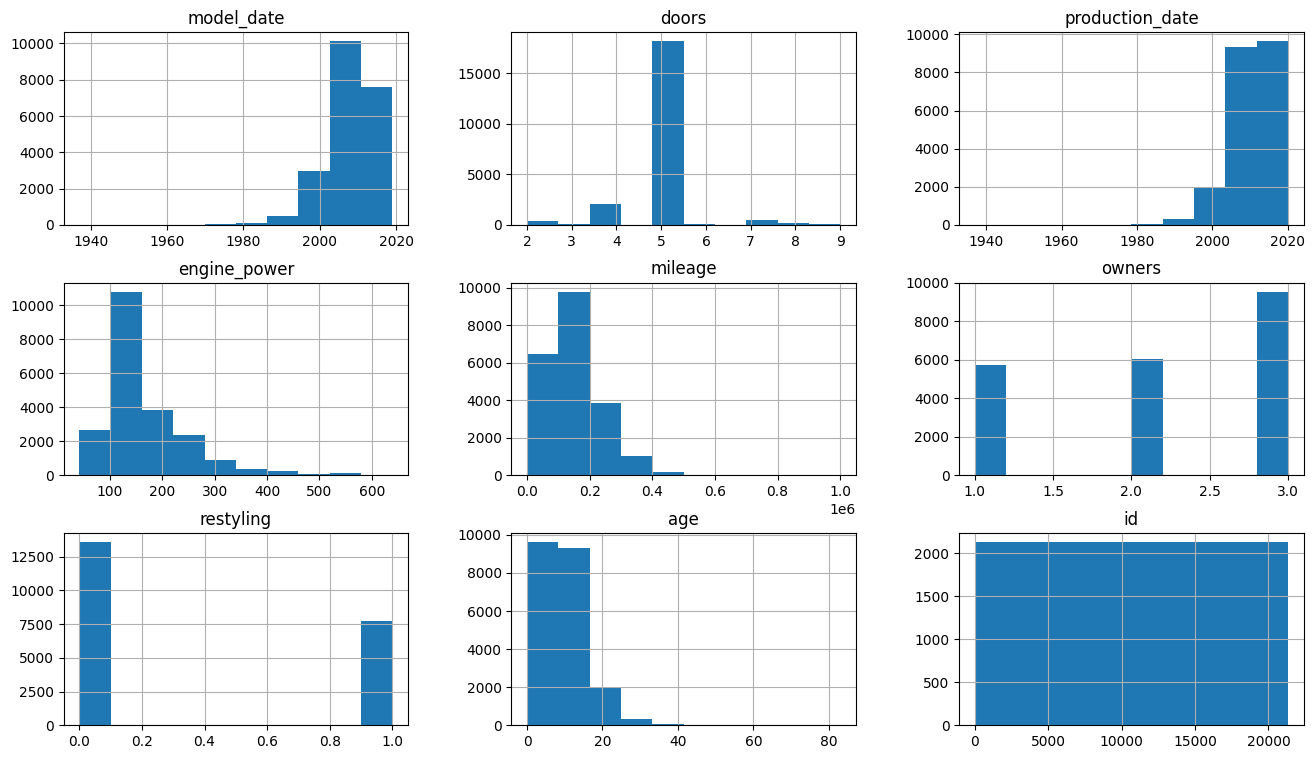

In [4]:
df_test.hist(figsize=(16,9))

In [5]:
for df in (df_train, df_test):
    df.drop(['from', 'style', 'color', 'description'], axis=1, inplace=True)

    df['engine_displacement'] = df['engine_displacement'].apply(lambda x: x if x != 'Electro' else 0)
    df['condition'] = df['condition'].apply(lambda x: 1 if x != 'Битый' else 0)
    df['generation'] = df['generation'].apply(lambda x: x if x != 'Unknown' else 0)
    df['features'] = df['features'].apply(lambda x: list(map(lambda x: x.strip().strip("'"), x[1:-1].split(','))) if (len(x.split(",")) != 1) & (x != 'Unknown')  else [])
    df['features_count'] = df['features'].apply(lambda x: len(x))
    df['wheel'] = df['wheel'].apply(lambda x: 1 if x == 'Левый' else 0)

In [6]:
df_train

,body,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,generation,restyling,age,features,price,brand,features_count
0,седан,бензин,2010,5,2015,автоматическая,1.6,150,100000,передний,1,1,2,2,0.0,5.0,"[Круиз-контроль, Электростеклоподъёмники перед...",550000,citroen,36
1,хэтчбек,бензин,2012,5,2015,автоматическая,1.6,109,75550,передний,1,1,1,1,1.0,5.0,"[Тёмный салон, Ткань (Материал салона)]",525000,chevrolet,2
2,седан,бензин,2000,5,2001,механическая,2.0,145,315000,передний,1,1,3,3,0.0,19.0,[],170000,ford,0
3,купе-хардтоп,бензин,1992,4,1994,автоматическая,3.2,220,225000,задний,1,1,3,1,0.0,26.0,"[Круиз-контроль, Электростеклоподъёмники перед...",950000,mercedes,30
4,седан,бензин,2015,5,2015,автоматическая,1.6,123,280000,передний,1,1,2,3,1.0,5.0,"[Подушка безопасности водителя, Крепление детс...",550000,kia,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49753,внедорожник,дизель,2012,5,2013,автоматическая,2.2,150,120000,полный,1,1,3,2,1.0,7.0,"[Круиз-контроль, Мультифункциональное рулевое ...",1250000,land_rover,69
49754,внедорожник,дизель,2006,5,2008,автоматическая,3.0,235,320000,полный,1,1,2,2,0.0,12.0,"[Защита картера, Фаркоп, Антипробуксовочная си...",900000,bmw,36
49755,седан,бензин,1999,5,2000,механическая,2.0,140,350,передний,1,1,3,5,0.0,20.0,[],160000,nissan,0
49756,седан,бензин,2016,5,2018,автоматическая,2.0,245,57738,задний,1,1,3,3,1.0,2.0,[],1715000,lexus,0


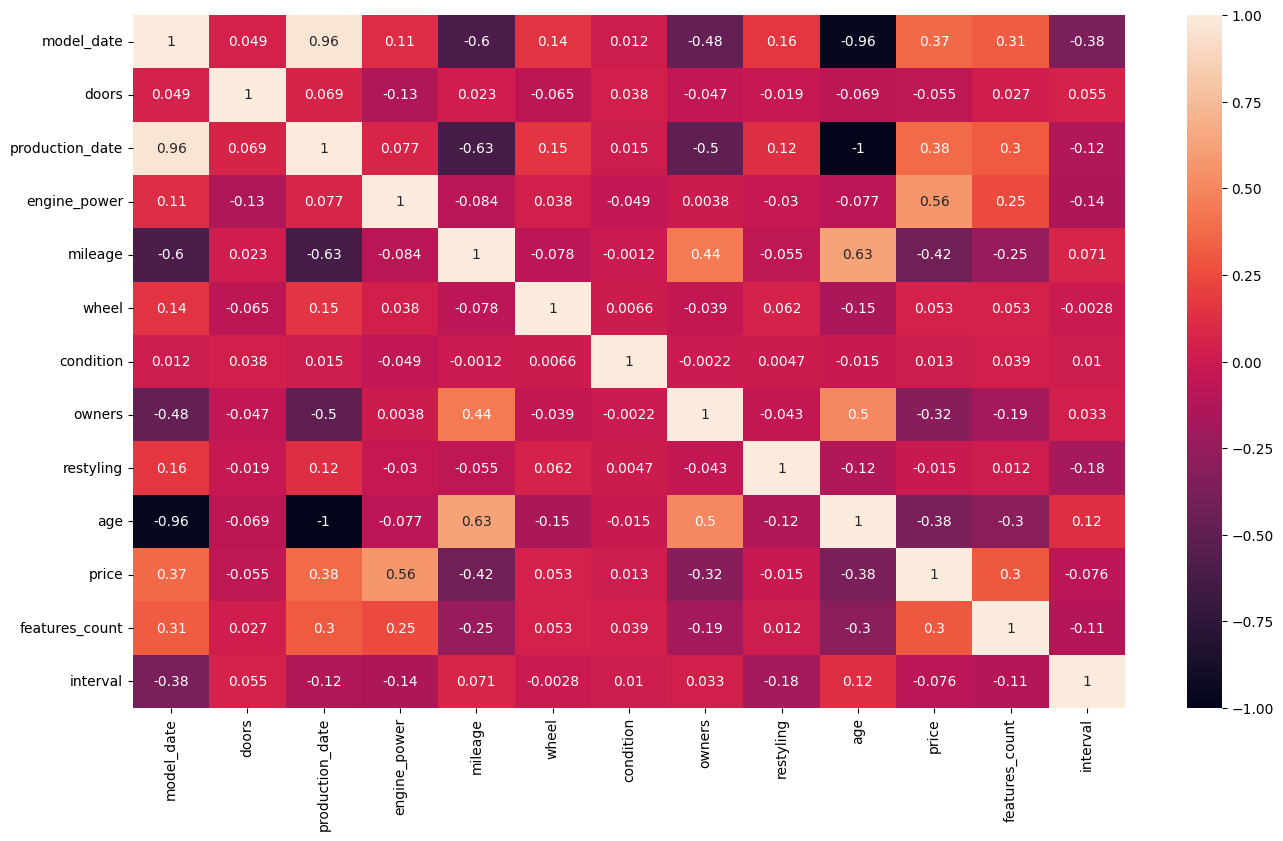

In [7]:
plt.figure(figsize=(16, 9))

data = df_train.select_dtypes(include=['float64', 'int64', 'bool'])
data['interval'] = df_train['production_date'] - df_train['model_date']
sns.heatmap(data.corr(), annot=True)
plt.show()

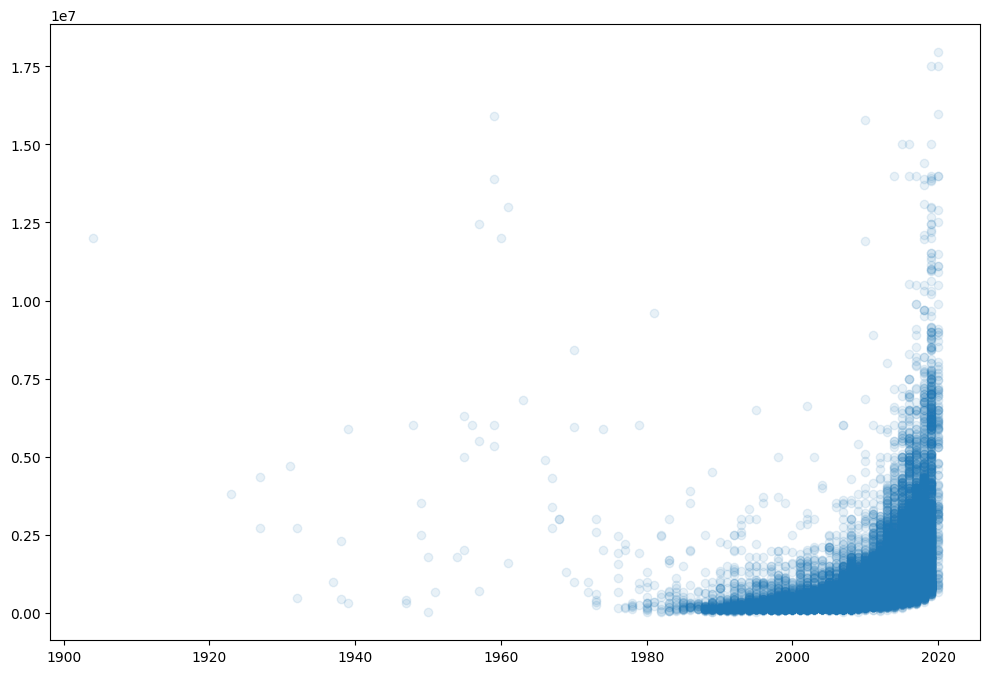

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['production_date'], df_train['price'], 'o', alpha=0.1)

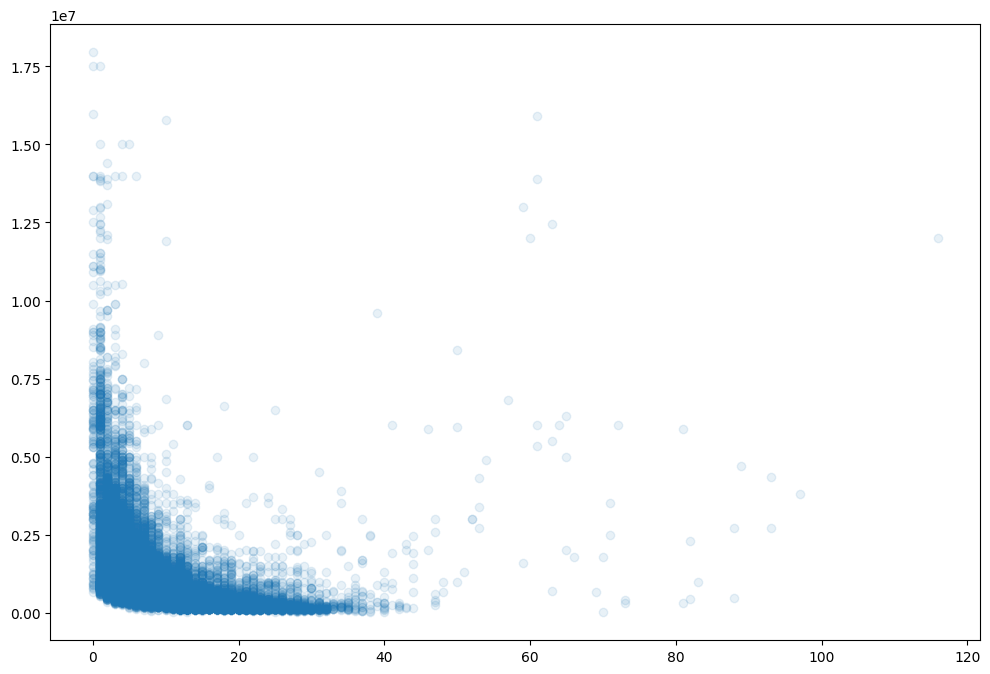

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['age'], df_train['price'], 'o', alpha=0.1)

In [10]:
df_train.drop(['production_date'], axis=1, inplace=True) 
df_test.drop(['production_date'], axis=1, inplace=True) 


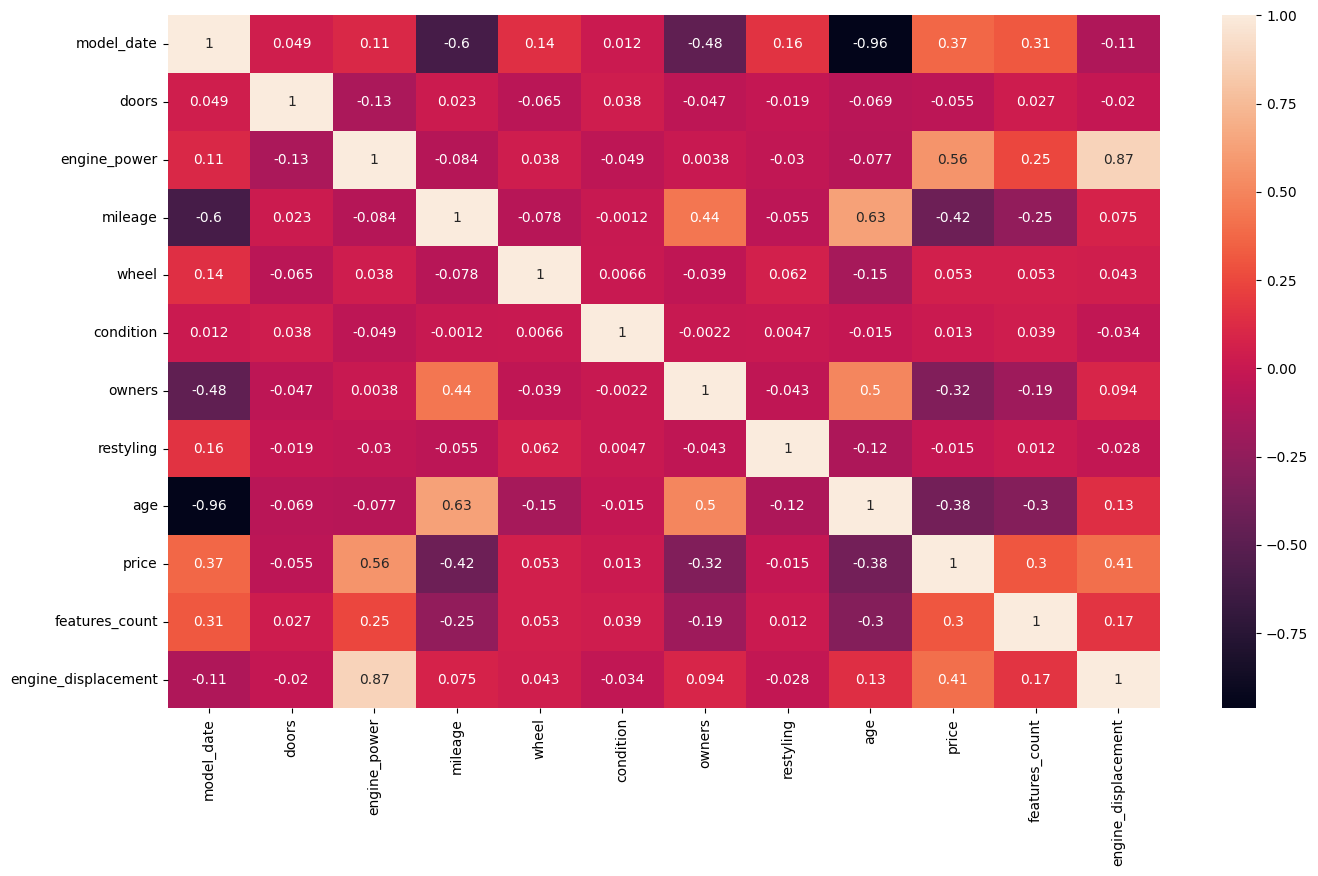

In [11]:
plt.figure(figsize=(16, 9))

data = df_train.select_dtypes(include=['float64', 'int64', 'bool'])
data['engine_displacement'] = df_train['engine_displacement']
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
train_features = [i for i in (j for j in df_train['features'].to_list())][0]
test_features = [i for i in (j for j in df_test['features'].to_list())][0]

features = list(set(train_features) & set(test_features))
for i in range(len(features)):
    feature = features[i]
    df_train[f'feature_{i}'] = df_train['features'].apply(lambda x: 1 if feature in x else 0)
    df_test[f'feature_{i}'] = df_test['features'].apply(lambda x: 1 if feature in x else 0)
    
df_train.drop(['features'], axis=1, inplace=True)
df_test.drop(['features'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import OneHotEncoder

for df in (df_train, df_test):
    
    fuel_features = df[['fuel']]
    transmission_features = df[['transmission']]
    body_features = df[['body']]
    wheel_features = df[['wheel']]
    drive_type_features = df[['drive_type']]
    brand_features = df[['brand']]

    cat_encoder_fuel = OneHotEncoder()
    cat_encoder_transmission = OneHotEncoder()  
    cat_encoder_body = OneHotEncoder() 
    cat_encoder_wheel = OneHotEncoder()
    cat_encoder_brand = OneHotEncoder()
    cat_encoder_drive_type = OneHotEncoder()

    df['fuel_encoded'] = cat_encoder_fuel.fit_transform(fuel_features).toarray().tolist()
    df['transmission_encoded'] = cat_encoder_transmission.fit_transform(transmission_features).toarray().tolist()
    df['body_encoded'] = cat_encoder_body.fit_transform(body_features).toarray().tolist()
    df['wheel_encoded'] = cat_encoder_wheel.fit_transform(wheel_features).toarray().tolist()
    df['brand_encoded'] = cat_encoder_brand.fit_transform(brand_features).toarray().tolist()
    df['drive_type_encoded'] = cat_encoder_drive_type.fit_transform(drive_type_features).toarray().tolist()

    df[['fuel_encoded_'+str(i) for i in range(len(df['fuel_encoded'][0]))]] = pd.DataFrame(df['fuel_encoded'].tolist(), index=df.index)
    df[['transmission_encoded_'+str(i) for i in range(len(df['transmission_encoded'][0]))]] = pd.DataFrame(df['transmission_encoded'].tolist(), index=df.index)
    df[['body_encoded_'+str(i) for i in range(len(df['body_encoded'][0]))]] = pd.DataFrame(df['body_encoded'].tolist(), index=df.index)
    df[['wheel_encoded_'+str(i) for i in range(len(df['wheel_encoded'][0]))]] = pd.DataFrame(df['wheel_encoded'].tolist(), index=df.index)
    df[['brand_encoded_'+str(i) for i in range(len(df['brand_encoded'][0]))]] = pd.DataFrame(df['brand_encoded'].tolist(), index=df.index)
    df[['drive_type_encoded_'+str(i) for i in range(len(df['drive_type_encoded'][0]))]] = pd.DataFrame(df['drive_type_encoded'].tolist(), index=df.index)
    
    df.drop(['body', 'fuel', 'transmission', 'drive_type', 'brand', 'fuel_encoded', 'transmission_encoded', 'body_encoded', 'wheel_encoded', 'brand_encoded', 'drive_type_encoded'], axis=1, inplace=True)

In [14]:
# в Test сете нету fuel_encoded_7
df_train.drop(['fuel_encoded_7'], axis=1, inplace=True)

In [15]:
df_train

,model_date,doors,engine_displacement,engine_power,mileage,wheel,condition,owners,generation,restyling,...,brand_encoded_12,brand_encoded_13,brand_encoded_14,brand_encoded_15,brand_encoded_16,brand_encoded_17,brand_encoded_18,drive_type_encoded_0,drive_type_encoded_1,drive_type_encoded_2
0,2010,5,1.6,150,100000,1,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2012,5,1.6,109,75550,1,1,1,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2000,5,2.0,145,315000,1,1,3,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1992,4,3.2,220,225000,1,1,3,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2015,5,1.6,123,280000,1,1,2,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49753,2012,5,2.2,150,120000,1,1,3,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49754,2006,5,3.0,235,320000,1,1,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49755,1999,5,2.0,140,350,1,1,3,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49756,2016,5,2.0,245,57738,1,1,3,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
df_train.to_csv('train_without_stand.csv', index=False)
df_test.to_csv('test_without_stand.csv', index=False)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

price = df_train['price']
id = df_test['id']

df_train.drop(['price'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

df_standardized_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_standardized_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [18]:
pd.concat([df_standardized_train, price], axis=1).to_csv('train_preprocessed.csv', index=False)
pd.concat([df_standardized_test, id], axis=1).to_csv('test_preprocessed.csv', index=False)